In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model

In [133]:
df = pd.read_csv('/content/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# **EDA**

explore the features of the data, looking for missing values and duplicates to handle them

In [134]:
df.shape

(20640, 10)

In [135]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [137]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [138]:
#checking for nulls
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [139]:
#drop nulls
df.dropna(inplace=True)

In [140]:
#cheching for duplicates
df.duplicated().sum()

np.int64(0)

explore the distripution of the data

In [141]:
from sklearn.model_selection import train_test_split
x = df.drop('median_house_value', axis=1)
y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [142]:
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)

In [143]:
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,214600.0
...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,<1H OCEAN,273400.0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,<1H OCEAN,160800.0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,<1H OCEAN,335400.0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,NEAR BAY,231200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

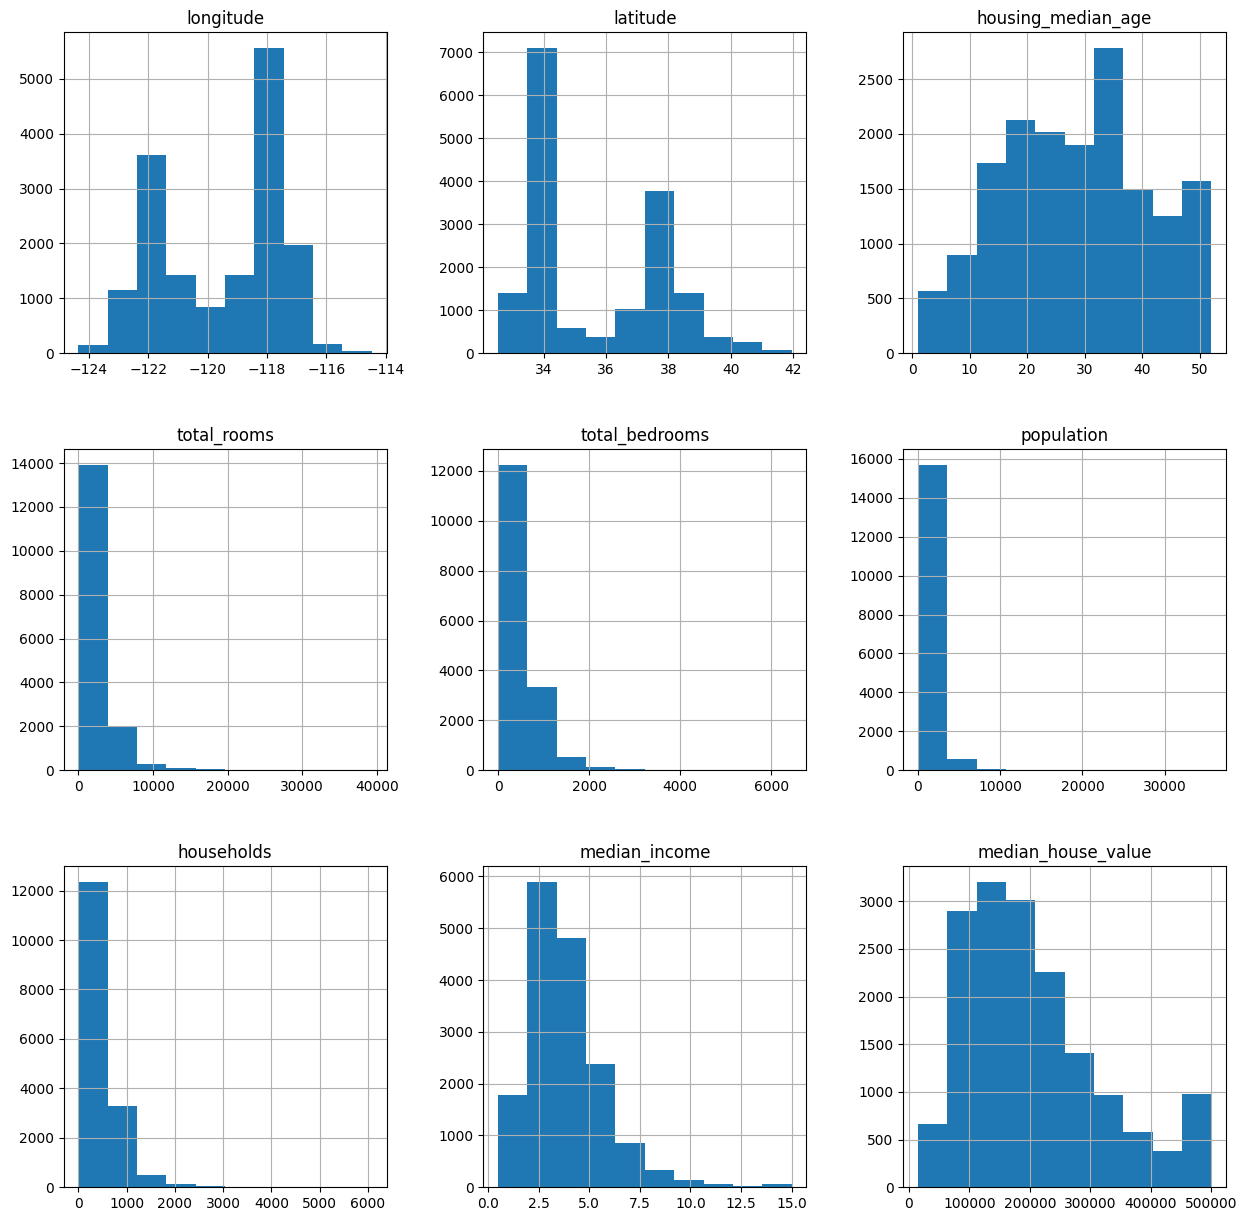

In [144]:
train.hist(figsize=(15,15))

# **Preprocessing**

normalize the train data to more normal distripution form

In [145]:
# Apply log transformation to numerical features in train set
for col in ['total_rooms', 'total_bedrooms', 'population', 'households']:
    x_train[col] = np.log1p(x_train[col])

# Apply log transformation to numerical features in test set
for col in ['total_rooms', 'total_bedrooms', 'population', 'households']:
    x_test[col] = np.log1p(x_test[col])

In [146]:
# One-hot encode the 'ocean_proximity' column for train set
x_train = pd.get_dummies(x_train, columns=['ocean_proximity'], drop_first=True)

# One-hot encode the 'ocean_proximity' column for test set
x_test = pd.get_dummies(x_test, columns=['ocean_proximity'], drop_first=True)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

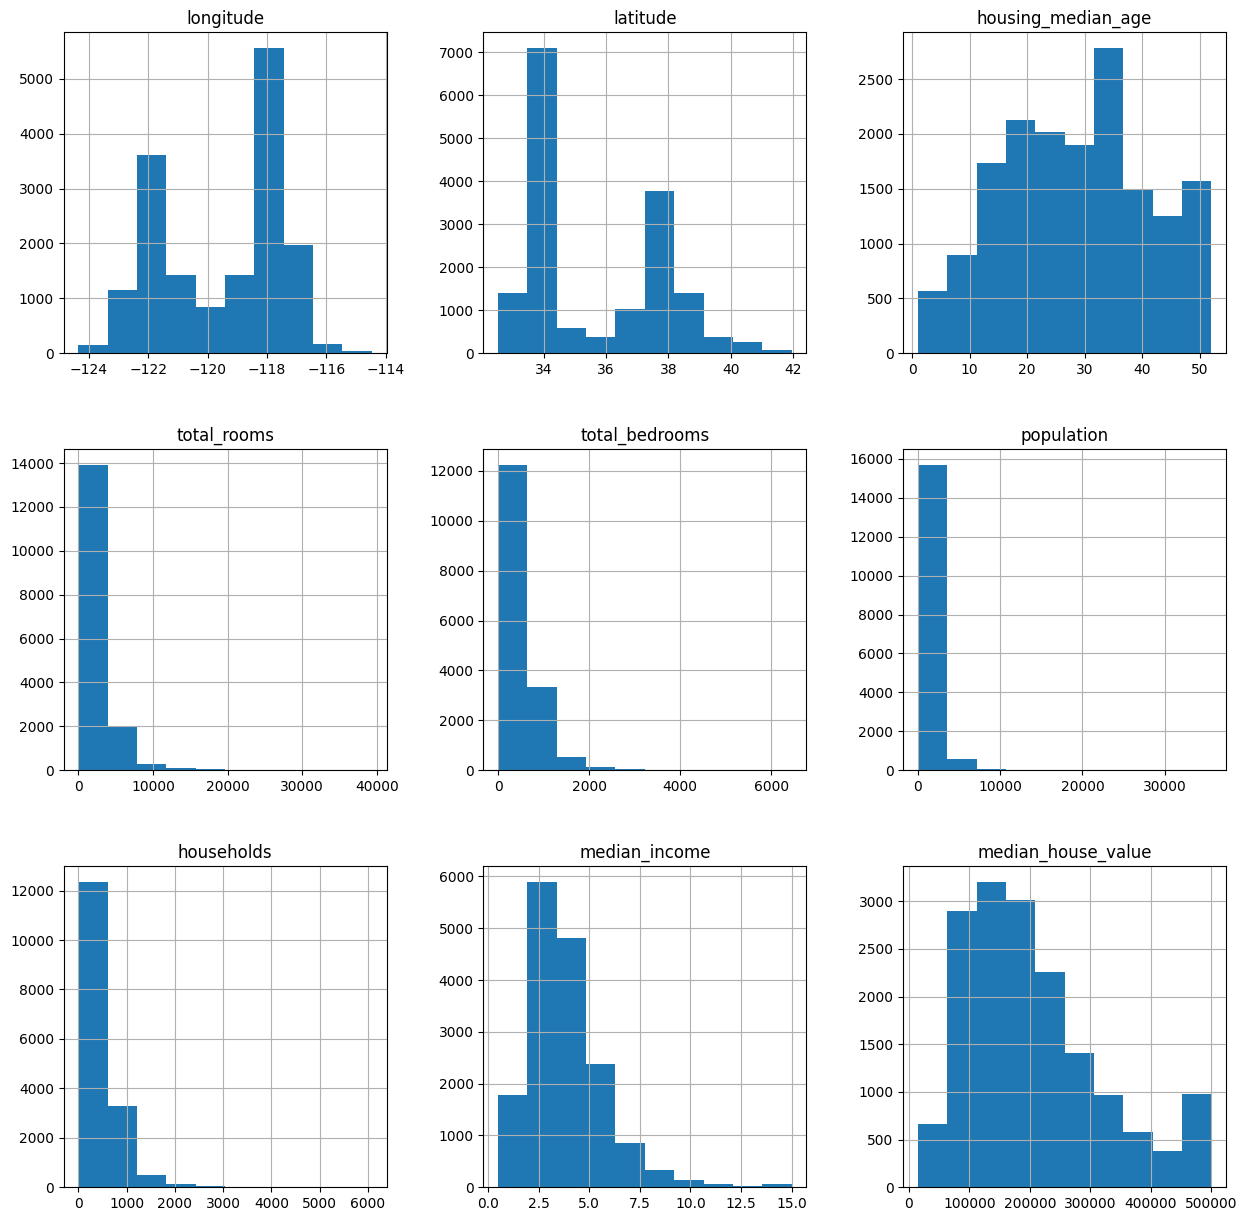

In [147]:
train.hist(figsize=(15,15))

Encode categorical feature for the model trainig

In [148]:
train = train.join(pd.get_dummies(train['ocean_proximity'])).drop('ocean_proximity', axis=1)

In [149]:
test = test.join(pd.get_dummies(test['ocean_proximity'])).drop('ocean_proximity', axis=1)

In [150]:
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,227600.0,True,False,False,False,False
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,110400.0,False,True,False,False,False
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,248100.0,False,True,False,False,False
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,305600.0,True,False,False,False,False
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,214600.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,273400.0,True,False,False,False,False
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,160800.0,True,False,False,False,False
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,335400.0,True,False,False,False,False
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,231200.0,False,False,False,True,False


<Axes: >

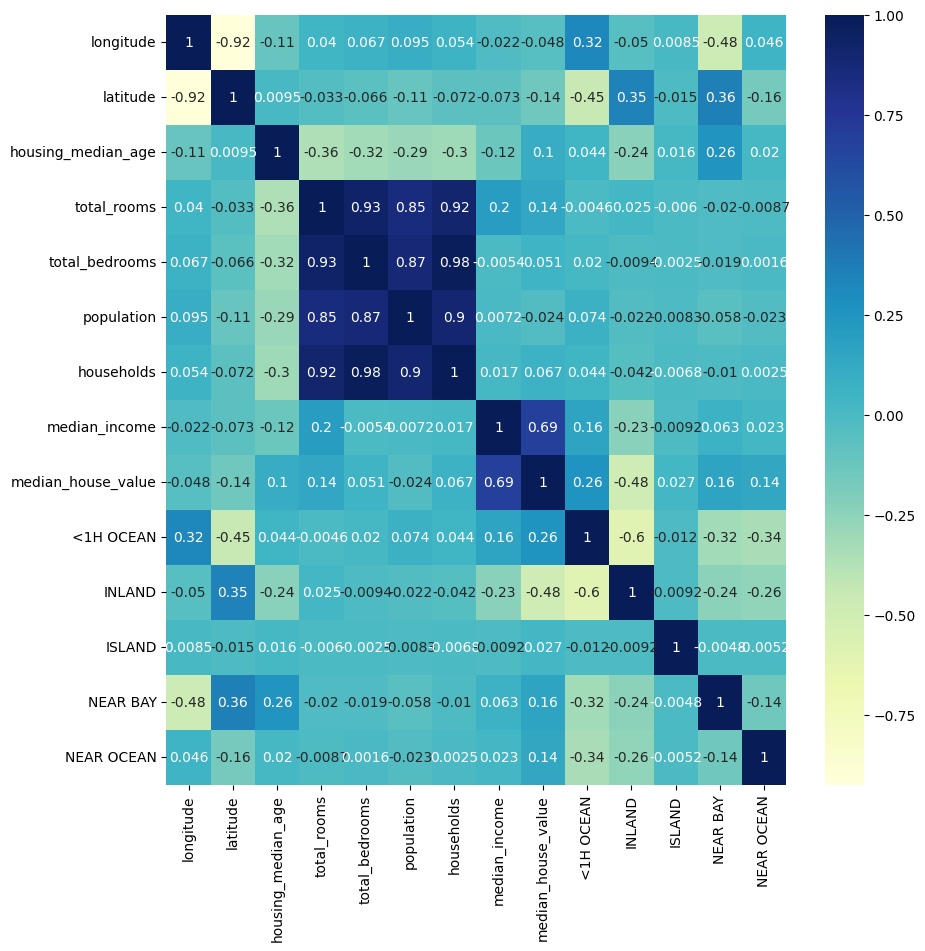

In [151]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='longitude', ylabel='latitude'>

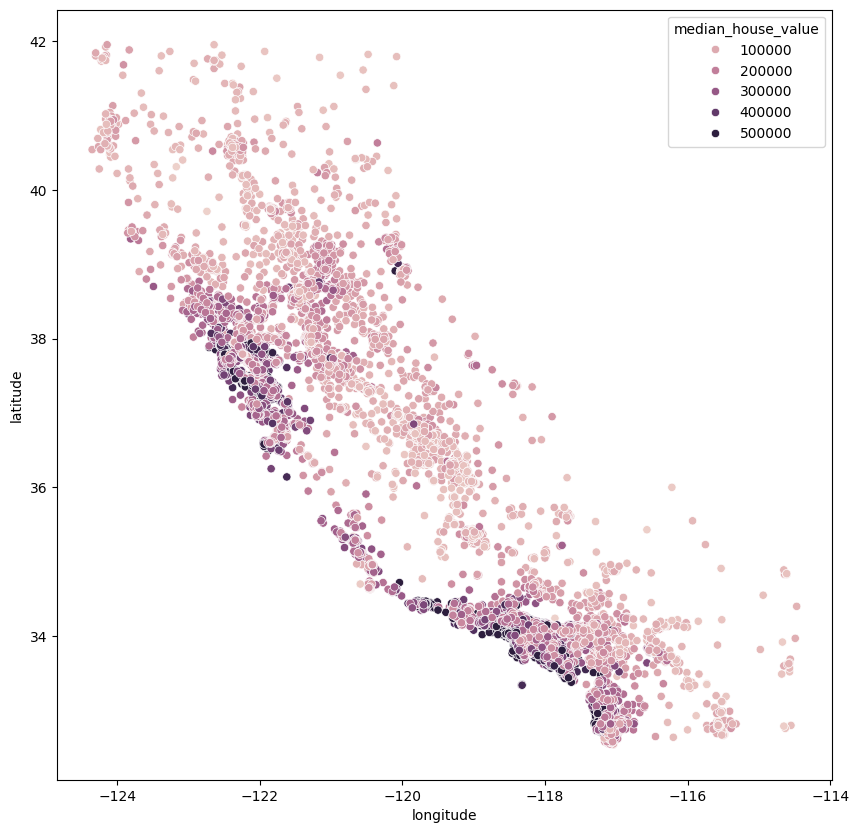

In [152]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=train, x='longitude', y='latitude', hue='median_house_value')

# **Feature Engineering**

In [153]:
# Feature Engineering for train set
x_train['bedroom_ratio'] = x_train['total_bedrooms'] / x_train['total_rooms']
x_train['household_rooms'] = x_train['total_rooms'] / x_train['households']

In [154]:
# Feature Engineering for test set
x_test['bedroom_ratio'] = x_test['total_bedrooms'] / x_test['total_rooms']
x_test['household_rooms'] = x_test['total_rooms'] / x_test['households']

<Axes: >

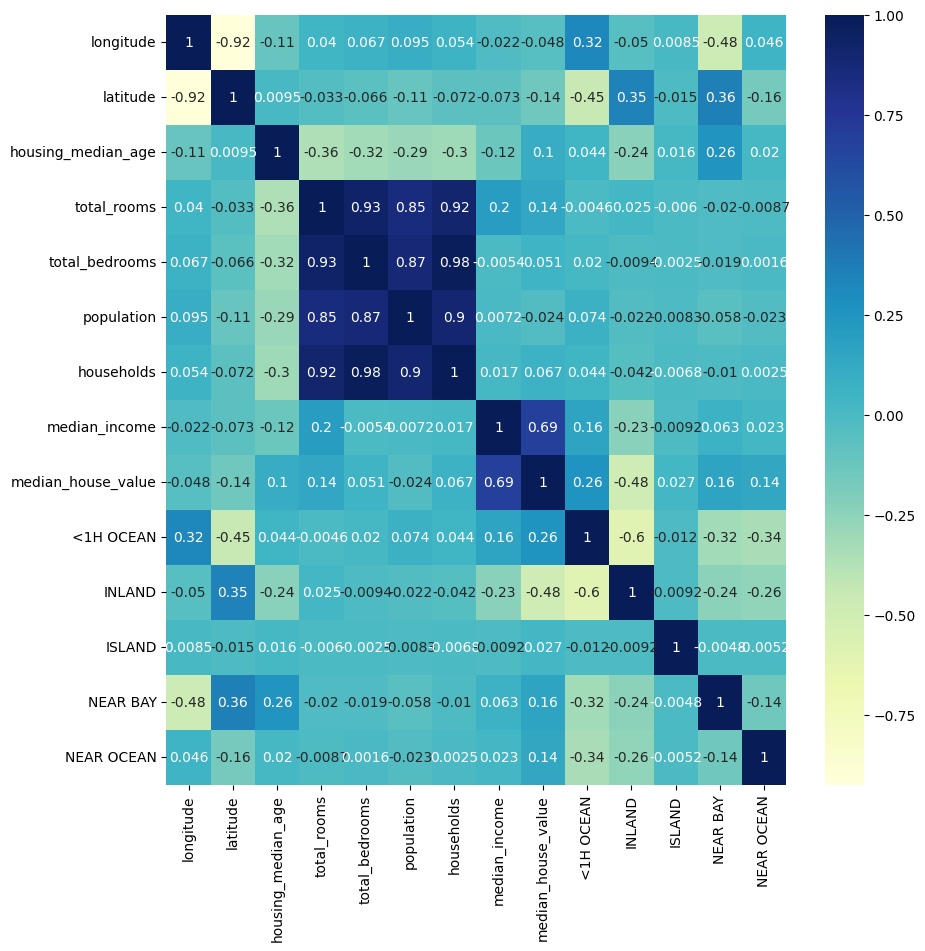

In [155]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, cmap='YlGnBu')

# **Modeling**

**LinearRegression**

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [157]:
x_train, y_train = train.drop('median_house_value', axis=1), train['median_house_value']
x_test, y_test = test.drop('median_house_value', axis=1), test['median_house_value']

In [158]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [159]:
reg.score(x_test, y_test)

0.6488402154432009

**Random Forest**

In [160]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [161]:
forest.score(x_test, y_test)


0.8262284076277608

**Grid search**

In [163]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [3, 10, 30],
    'max_features': [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             scoring='neg_mean_squared_error')

In [166]:
best_forest = grid_search.best_estimator_

In [167]:
best_forest.score(x_test, y_test)

0.82737861205339